In [ ]:
!pip install tensorflow
!pip install tensorflow_addons

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 28.1 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.3.0
    Uninstalling typeguard-4.3.0:
      Successfully uninstalled typeguard-4.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inflect 7.4.0 requires typeguard>=4.0.1, but you have typeguard 2.13.3 which is incompatible.


In [4]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa
import os
from PIL import Image
import cv2
import seaborn as sns
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import plot_model
from sklearn.metrics import confusion_matrix, classification_report

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [40]:
! kaggle datasets download -d ravirajsinh45/real-life-industrial-dataset-of-casting-product


Dataset URL: https://www.kaggle.com/datasets/ravirajsinh45/real-life-industrial-dataset-of-casting-product
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
real-life-industrial-dataset-of-casting-product.zip: Skipping, found more recently modified local copy (use --force to force download)


In [41]:
!unzip /content/real-life-industrial-dataset-of-casting-product.zip

Streaming output truncated to the last 5000 lines.
  inflating: casting_data/casting_data/train/def_front/cast_def_0_5259.jpeg  
  inflating: casting_data/casting_data/train/def_front/cast_def_0_526.jpeg  
  inflating: casting_data/casting_data/train/def_front/cast_def_0_5260.jpeg  
  inflating: casting_data/casting_data/train/def_front/cast_def_0_5262.jpeg  
  inflating: casting_data/casting_data/train/def_front/cast_def_0_5265.jpeg  
  inflating: casting_data/casting_data/train/def_front/cast_def_0_527.jpeg  
  inflating: casting_data/casting_data/train/def_front/cast_def_0_5270.jpeg  
  inflating: casting_data/casting_data/train/def_front/cast_def_0_5272.jpeg  
  inflating: casting_data/casting_data/train/def_front/cast_def_0_5274.jpeg  
  inflating: casting_data/casting_data/train/def_front/cast_def_0_528.jpeg  
  inflating: casting_data/casting_data/train/def_front/cast_def_0_5282.jpeg  
  inflating: casting_data/casting_data/train/def_front/cast_def_0_5283.jpeg  
  inflating: cas

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image parameters
image_shape = (300, 300, 1)  # 300x300 pixels, grayscale images
batch_size = 32

# Paths to training and testing data
train_path = '/content/casting_data/casting_data/train'
test_path = '/content/casting_data/casting_data/test'

# Create an ImageDataGenerator for data augmentation
image_gen = ImageDataGenerator(
    rescale=1/255,               # Normalize the pixel values to [0, 1]
    zoom_range=0.1,              # Random zoom augmentation
    brightness_range=[0.9, 1.0]  # Randomly adjust brightness between 90% to 100%
)

# Load and preprocess training images
train_set = image_gen.flow_from_directory(
    train_path,
    target_size=image_shape[:2],  # Resize images to 300x300
    color_mode="grayscale",       # Grayscale images
    classes={'def_front': 0, 'ok_front': 1},  # Assign class labels
    batch_size=batch_size,
    class_mode='binary',          # Binary classification (defective or not)
    shuffle=True,                 # Shuffle training data
    seed=0                        # Seed for reproducibility
)

# Load and preprocess testing images
test_set = image_gen.flow_from_directory(
    test_path,
    target_size=image_shape[:2],  # Resize images to 300x300
    color_mode="grayscale",       # Grayscale images
    classes={'def_front': 0, 'ok_front': 1},  # Assign class labels
    batch_size=batch_size,
    class_mode='binary',          # Binary classification (defective or not)
    shuffle=False,                # Do not shuffle test data
    seed=0                        # Seed for reproducibility
)


Found 6633 images belonging to 2 classes.
Found 715 images belonging to 2 classes.


In [7]:
x_train = []
y_train = []
for i in range(len(train_set)):
    batch_x, batch_y = train_set.next()
    x_train.append(batch_x)
    y_train.append(batch_y)
x_train = np.concatenate(x_train)
y_train = np.concatenate(y_train).reshape(-1, 1)

x_test = []
y_test = []
for i in range(len(test_set)):
    batch_x, batch_y = test_set.next()
    x_test.append(batch_x)
    y_test.append(batch_y)
x_test = np.concatenate(x_test, axis=0)
y_test = np.concatenate(y_test, axis=0).reshape(-1, 1)


In [9]:
print(f"x_train shape: {x_train.shape} - y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape} - y_test shape: {y_test.shape}")
type(x_train)

x_train shape: (6633, 300, 300, 1) - y_train shape: (6633, 1)
x_test shape: (715, 300, 300, 1) - y_test shape: (715, 1)


numpy.ndarray

[0.]


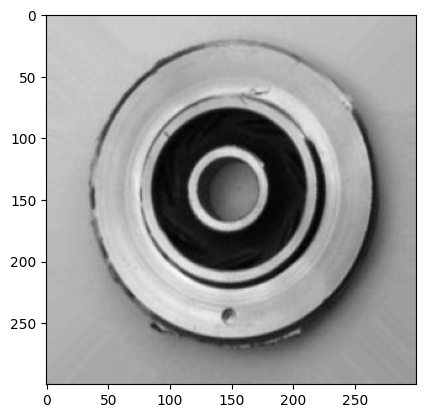

[0.]


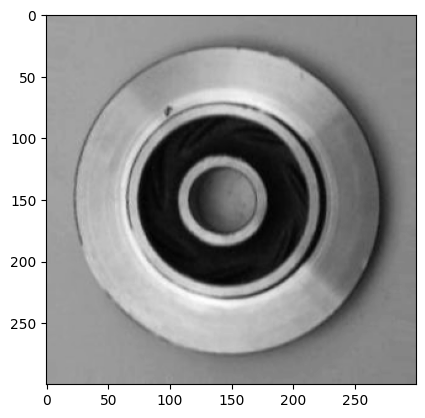

In [10]:
print(y_train[8])
plt.imshow(x_train[8],cmap='gray')
plt.show()
print(y_train[1])
plt.imshow(x_train[1],cmap='gray')
plt.show()
# 1 = ok , 0 = def

In [11]:
lb = LabelEncoder()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
num_classes = 2
input_shape = (300, 300, 1)
learning_rate = 0.001
weight_decay = 0.0001
batch_size = 256
num_epochs = 10
image_size = 72  # We'll resize input images to this size
patch_size = 6  # Size of the patches to be extract from the input images
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 4
transformer_units = [
    projection_dim * 2,
    projection_dim,
]  # Size of the transformer layers
transformer_layers = 8
mlp_head_units = [2048, 1024]  # Size of the dense layers of the final classifier


In [13]:
data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(image_size, image_size),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(
            height_factor=0.2, width_factor=0.2
        ),
    ],
    name="data_augmentation",
)
# Compute the mean and the variance of the training data for normalization.
data_augmentation.layers[0].adapt(x_train)

In [14]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x


In [15]:
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super().__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches


Image size: 72 X 72
Patch size: 6 X 6
Patches per image: 144
Elements per patch: 36


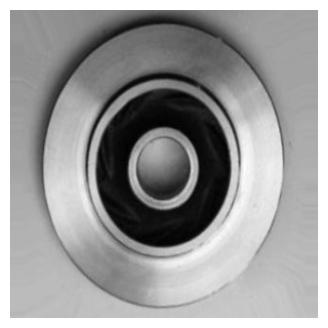

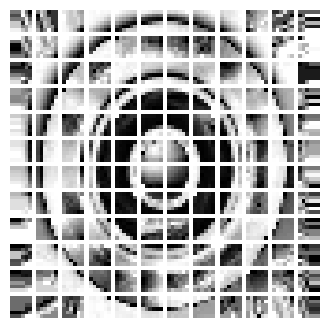

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
image = x_train[np.random.choice(range(x_train.shape[0]))]
plt.imshow(image,cmap='gray')
plt.axis("off")

resized_image = tf.image.resize(
    tf.convert_to_tensor([image]), size=(image_size, image_size)
)
patches = Patches(patch_size)(resized_image)
print(f"Image size: {image_size} X {image_size}")
print(f"Patch size: {patch_size} X {patch_size}")
print(f"Patches per image: {patches.shape[1]}")
print(f"Elements per patch: {patches.shape[-1]}")

n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4, 4))
for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = tf.reshape(patch, (patch_size, patch_size,1))
    plt.imshow(patch_img.numpy(),cmap='gray')
    plt.axis("off")

<ipython-input-27-cb19664683a4>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred_probability = vit_classifier.predict_generator(x_test)


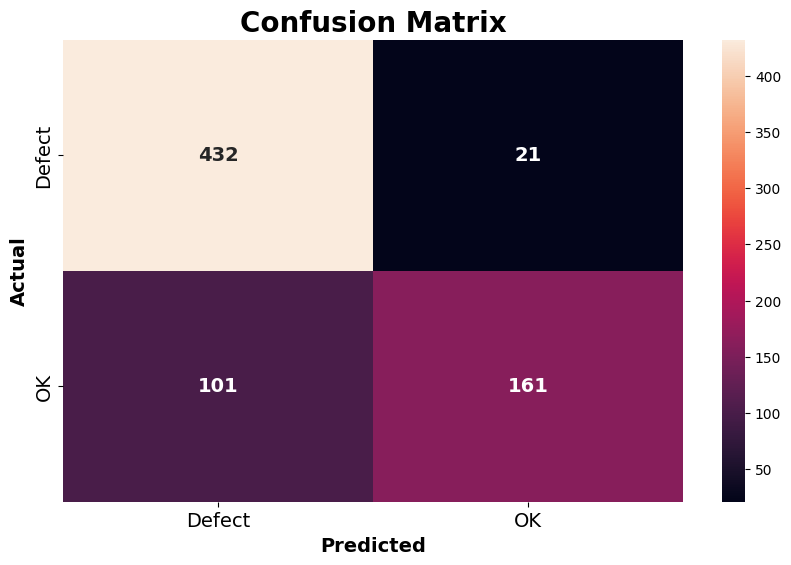

In [ ]:
pred_probability = vit_classifier.predict_generator(x_test)
predictions = (pred_probability[:, 1] > 0.5).astype(int)

plt.figure(figsize=(10,6))
plt.title("Confusion Matrix", size=20, weight='bold')
sns.heatmap(
    confusion_matrix(y_test, predictions),
    annot=True,
    annot_kws={'size':14, 'weight':'bold'},
    fmt='d',
    xticklabels=['Defect', 'OK'],
    yticklabels=['Defect', 'OK'])
plt.tick_params(axis='both', labelsize=14)
plt.ylabel('Actual', size=14, weight='bold')
plt.xlabel('Predicted', size=14, weight='bold')
plt.show()

In [ ]:
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super().__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

In [ ]:
def create_vit_classifier():
    inputs = layers.Input(shape=input_shape)
    # Augment data.
    augmented = data_augmentation(inputs)
    # Create patches.
    patches = Patches(patch_size)(augmented)
    # Encode patches.
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    # Classify outputs.
    logits = layers.Dense(num_classes)(features)
    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=logits)
    return model

In [ ]:
def run_experiment(model):
    optimizer = tfa.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay
    )

    model.compile(
        optimizer=optimizer,
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[
            keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
            keras.metrics.SparseTopKCategoricalAccuracy(5, name="top-5-accuracy"),
        ],
    )

    checkpoint_filepath = "/tmp/checkpoint"
    checkpoint_callback = keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_accuracy",
        save_best_only=True,
        save_weights_only=True,
    )

    history = model.fit(
        x=x_train,
        y=y_train,
        batch_size=batch_size,
        epochs=num_epochs,
        validation_split=0.1,
        callbacks=[checkpoint_callback],
    )

    model.load_weights(checkpoint_filepath)
    _, accuracy, top_5_accuracy = model.evaluate(x_test, y_test)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")
    print(f"Test top 5 accuracy: {round(top_5_accuracy * 100, 2)}%")

    return history


vit_classifier = create_vit_classifier()
history = run_experiment(vit_classifier)

Epoch 1/10
24/24 [==============================] - 450s 18s/step - loss: 2.1996 - accuracy: 0.6396 - top-5-accuracy: 1.0000 - val_loss: 0.5138 - val_accuracy: 0.7229 - val_top-5-accuracy: 1.0000
Epoch 2/10
24/24 [==============================] - 431s 18s/step - loss: 0.5717 - accuracy: 0.7242 - top-5-accuracy: 1.0000 - val_loss: 0.4717 - val_accuracy: 0.7771 - val_top-5-accuracy: 1.0000
Epoch 3/10
24/24 [==============================] - 428s 18s/step - loss: 0.4928 - accuracy: 0.7614 - top-5-accuracy: 1.0000 - val_loss: 0.4173 - val_accuracy: 0.8193 - val_top-5-accuracy: 1.0000
Epoch 4/10
24/24 [==============================] - 435s 18s/step - loss: 0.4534 - accuracy: 0.7908 - top-5-accuracy: 1.0000 - val_loss: 0.3970 - val_accuracy: 0.8193 - val_top-5-accuracy: 1.0000
Epoch 5/10
24/24 [==============================] - 431s 18s/step - loss: 0.4427 - accuracy: 0.7919 - top-5-accuracy: 1.0000 - val_loss: 0.4280 - val_accuracy: 0.7967 - val_top-5-accuracy: 1.0000
Epoch 6/10
24/24 [==

In [ ]:
# Example to download the fruits dataset
!kaggle datasets download -d sriramr/fruits-fresh-and-rotten-for-classification

# Unzip the dataset
!unzip fruits-fresh-and-rotten-for-classification.zip -d /content/fruits_dataset


Streaming output truncated to the last 5000 lines.
  inflating: /content/fruits_dataset/dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.02.09 PM.png  
  inflating: /content/fruits_dataset/dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.02.18 PM.png  
  inflating: /content/fruits_dataset/dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.02.24 PM.png  
  inflating: /content/fruits_dataset/dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.02.37 PM.png  
  inflating: /content/fruits_dataset/dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.02.51 PM.png  
  inflating: /content/fruits_dataset/dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.03.02 PM.png  
  inflating: /content/fruits_dataset/dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.03.12 PM.png  
  inflating: /content/fruits_dataset/dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 a

In [ ]:
import os
dataset_dir = '/content/fruits_dataset/'
for dirname, _, filenames in os.walk(dataset_dir):
    for filename in filenames:
        print(os.path.join(dirname, filename))


Streaming output truncated to the last 5000 lines.
/content/fruits_dataset/dataset/train/rottenbanana/saltandpepper_Screen Shot 2018-06-12 at 8.53.47 PM.png
/content/fruits_dataset/dataset/train/rottenbanana/rotated_by_30_Screen Shot 2018-06-12 at 8.59.51 PM.png
/content/fruits_dataset/dataset/train/rottenbanana/rotated_by_60_Screen Shot 2018-06-12 at 9.02.24 PM.png
/content/fruits_dataset/dataset/train/rottenbanana/saltandpepper_Screen Shot 2018-06-12 at 9.16.57 PM.png
/content/fruits_dataset/dataset/train/rottenbanana/Screen Shot 2018-06-12 at 9.12.49 PM.png
/content/fruits_dataset/dataset/train/rottenbanana/Screen Shot 2018-06-12 at 8.58.49 PM.png
/content/fruits_dataset/dataset/train/rottenbanana/translation_Screen Shot 2018-06-12 at 9.00.38 PM.png
/content/fruits_dataset/dataset/train/rottenbanana/translation_Screen Shot 2018-06-12 at 9.20.47 PM.png
/content/fruits_dataset/dataset/train/rottenbanana/rotated_by_60_Screen Shot 2018-06-12 at 9.06.56 PM.png
/content/fruits_dataset/dat

In [4]:
import os
import cv2
import numpy as np
from tqdm import tqdm

# Function to load images and label them as fresh (0) or rotten (1)
def load_fresh_rotten_data():
    X = []  # List to store image data
    Y = []  # List to store labels
    base_dir = '/content/fruits_dataset/dataset/train'  # Update to the correct dataset path in Colab

    # List of fresh fruit folders
    fresh_folders = ['freshapples', 'freshbanana', 'freshoranges']
    # List of rotten fruit folders
    rotten_folders = ['rottenapples', 'rottenbanana', 'rottenoranges']

    # Process fresh fruits (label = 0)
    for fresh_folder in fresh_folders:
        path = os.path.join(base_dir, fresh_folder)  # Path to each fresh fruit folder
        for img_name in tqdm(os.listdir(path)):  # Iterate over each image in the folder
            img = cv2.imread(os.path.join(path, img_name))  # Read the image
            img = cv2.resize(img, (100, 100))  # Resize to 100x100
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
            X.append(img)  # Add image to the data list
            Y.append(0)  # Fresh label (0)

    # Process rotten fruits (label = 1)
    for rotten_folder in rotten_folders:
        path = os.path.join(base_dir, rotten_folder)  # Path to each rotten fruit folder
        for img_name in tqdm(os.listdir(path)):
            img = cv2.imread(os.path.join(path, img_name))
            img = cv2.resize(img, (100, 100))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            X.append(img)
            Y.append(1)  # Rotten label (1)

    return np.array(X), np.array(Y)  # Return the data and labels as NumPy arrays

# Load the dataset
X, Y = load_fresh_rotten_data()

# Normalize the image data (scale pixel values between 0 and 1)
X = X / 255.0  # Convert pixel values from [0, 255] to [0, 1]


100%|██████████| 1595/1595 [00:07<00:00, 207.06it/s]


In [5]:
from sklearn.model_selection import train_test_split

# Split the data into training (80%) and validation (20%) sets
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

# Check the shape of the data
print("Training data shape:", X_train.shape)
print("Validation data shape:", X_val.shape)

Training data shape: (8720, 100, 100, 3)
Validation data shape: (2181, 100, 100, 3)


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Build a binary classification CNN model
model_fresh_rotten = Sequential()

# Convolutional layer 1
model_fresh_rotten.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model_fresh_rotten.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional layer 2
model_fresh_rotten.add(Conv2D(64, (3, 3), activation='relu'))
model_fresh_rotten.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output of the convolutional layers
model_fresh_rotten.add(Flatten())

# Fully connected Dense layer
model_fresh_rotten.add(Dense(128, activation='relu'))

# Output layer (binary classification: fresh or rotten)
model_fresh_rotten.add(Dense(1, activation='sigmoid'))

# Compile the model
model_fresh_rotten.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model_fresh_rotten.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 33856)             0         
                                                                 
 dense (Dense)               (None, 128)               4

In [6]:
# Train the model for 10 epochs
history = model_fresh_rotten.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_val, Y_val))

Epoch 1/10
273/273 [==============================] - 126s 458ms/step - loss: 0.4493 - accuracy: 0.7773 - val_loss: 0.2907 - val_accuracy: 0.8771
Epoch 2/10
273/273 [==============================] - 120s 440ms/step - loss: 0.2615 - accuracy: 0.8899 - val_loss: 0.2008 - val_accuracy: 0.9193
Epoch 3/10
273/273 [==============================] - 121s 443ms/step - loss: 0.1979 - accuracy: 0.9189 - val_loss: 0.2080 - val_accuracy: 0.9120
Epoch 4/10
273/273 [==============================] - 115s 422ms/step - loss: 0.1489 - accuracy: 0.9420 - val_loss: 0.1408 - val_accuracy: 0.9390
Epoch 5/10
273/273 [==============================] - 120s 441ms/step - loss: 0.1189 - accuracy: 0.9531 - val_loss: 0.1374 - val_accuracy: 0.9436
Epoch 6/10
273/273 [==============================] - 120s 440ms/step - loss: 0.1039 - accuracy: 0.9591 - val_loss: 0.2634 - val_accuracy: 0.8978
Epoch 7/10
273/273 [==============================] - 119s 436ms/step - loss: 0.0875 - accuracy: 0.9655 - val_loss: 0.0981 -

In [7]:
# Evaluate the model on the validation set
val_loss, val_acc = model_fresh_rotten.evaluate(X_val, Y_val)

# Print validation accuracy
print(f"Validation Accuracy: {val_acc * 100:.2f}%")

69/69 [==============================] - 8s 113ms/step - loss: 0.0986 - accuracy: 0.9619
Validation Accuracy: 96.19%


In [8]:
# Save the model
model_fresh_rotten.save('fresh_rotten_classifier.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


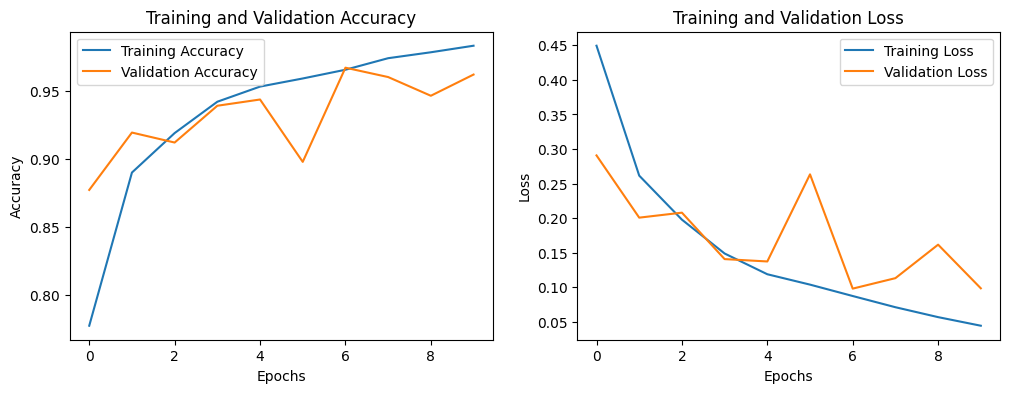

In [9]:
import matplotlib.pyplot as plt  # For displaying images

# Function to plot training and validation accuracy/loss
def plot_training_history(history):
    # Plot accuracy
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Plot training and validation history
plot_training_history(history)

69/69 [==============================] - 10s 147ms/step


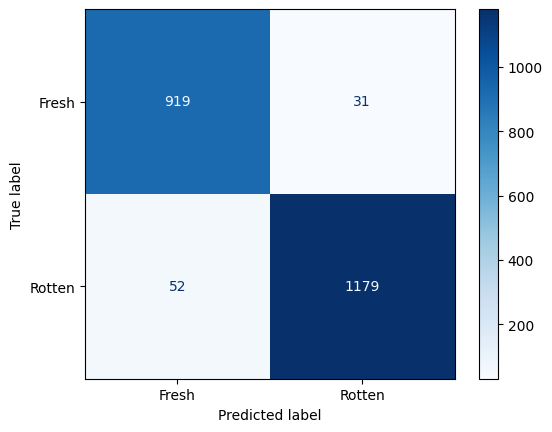

In [10]:
import matplotlib.pyplot as plt  # For displaying images

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get predictions for the validation set
Y_pred = model_fresh_rotten.predict(X_val)
Y_pred = (Y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Compute confusion matrix
cm = confusion_matrix(Y_val, Y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fresh', 'Rotten'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [12]:
from tensorflow.keras.preprocessing import image

# Function to load and preprocess the image for prediction
def load_image_for_prediction(img_path):
    img = image.load_img(img_path, target_size=(100, 100))  # Load and resize the image
    img_array = image.img_to_array(img)  # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions for model input
    img_array = img_array / 255.0  # Normalize the image

    return img_array

# Function to predict if the fruit is fresh or rotten
def predict_fresh_or_rotten(model, img_path):
    img_array = load_image_for_prediction(img_path)
    prediction = model.predict(img_array)

    if prediction > 0.5:
        return 'Rotten'
    else:
        return 'Fresh'

# Example usage:
img_path = '/content/fruits_dataset/dataset/train/rottenapples/Screen Shot 2018-06-07 at 2.15.20 PM.png'
result = predict_fresh_or_rotten(model_fresh_rotten, img_path)
print(f"The fruit is: {result}")

1/1 [==============================] - 0s 87ms/step
The fruit is: Rotten


In [14]:
def load_test_data():
    X_test = []
    Y_test = []
    test_dir = '/content/fruits_dataset/dataset/test'
    # Define the folders for fresh and rotten test images
    fresh_folders = ['freshapples', 'freshbanana', 'freshoranges']
    rotten_folders = ['rottenapples', 'rottenbanana', 'rottenoranges']

    # Load fresh images (label = 0)
    for fresh_folder in fresh_folders:
        path = os.path.join(test_dir, fresh_folder)
        for img_name in tqdm(os.listdir(path)):
            img = cv2.imread(os.path.join(path, img_name))
            img = cv2.resize(img, (100, 100))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            X_test.append(img)
            Y_test.append(0)  # Label: Fresh (0)

    # Load rotten images (label = 1)
    for rotten_folder in rotten_folders:
        path = os.path.join(test_dir, rotten_folder)
        for img_name in tqdm(os.listdir(path)):
            img = cv2.imread(os.path.join(path, img_name))
            img = cv2.resize(img, (100, 100))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            X_test.append(img)
            Y_test.append(1)  # Label: Rotten (1)

    return np.array(X_test), np.array(Y_test)

# Load the test dataset
X_test, Y_test = load_test_data()

# Normalize the test images
X_test = X_test / 255.0

100%|██████████| 403/403 [00:02<00:00, 200.29it/s]


85/85 [==============================] - 8s 91ms/step


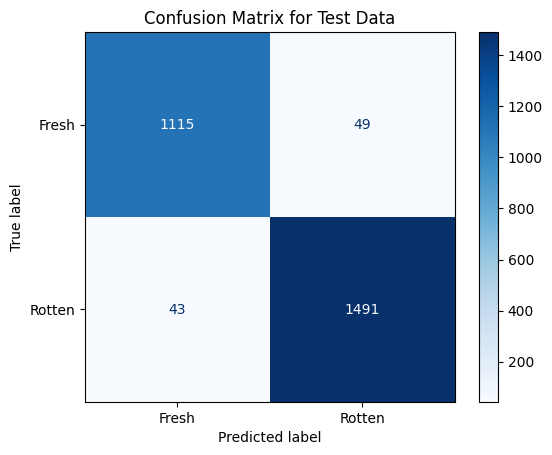

In [15]:
# Get predictions for the test set
Y_pred_test = model_fresh_rotten.predict(X_test)
Y_pred_test = (Y_pred_test > 0.5).astype(int)  # Convert probabilities to binary predictions

# Compute confusion matrix
cm_test = confusion_matrix(Y_test, Y_pred_test)

# Display confusion matrix
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['Fresh', 'Rotten'])
disp_test.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Test Data')
plt.show()

1/1 [==============================] - 0s 30ms/step
The fruit is: Rotten


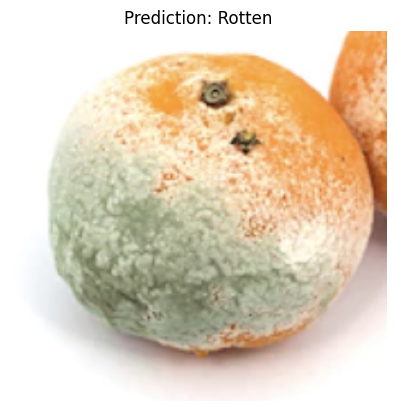

In [16]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Function to load and preprocess the uploaded image for prediction
def load_image_for_prediction(img_path):
    img = image.load_img(img_path, target_size=(100, 100))  # Load and resize the image
    img_array = image.img_to_array(img)  # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions for model input
    img_array = img_array / 255.0  # Normalize the image

    return img_array

# Function to predict if the fruit is fresh or rotten
def predict_fresh_or_rotten(model, img_path):
    img_array = load_image_for_prediction(img_path)
    prediction = model.predict(img_array)

    if prediction > 0.5:
        return 'Rotten'
    else:
        return 'Fresh'

# Example usage:
img_path = '/content/fruits_dataset/dataset/train/rottenoranges/Screen Shot 2018-06-12 at 11.19.47 PM.png'  # Path to the uploaded image
result = predict_fresh_or_rotten(model_fresh_rotten, img_path)
print(f"The fruit is: {result}")

# Optionally display the image
img = image.load_img(img_path)
plt.imshow(img)
plt.title(f'Prediction: {result}')
plt.axis('off')
plt.show()

1/1 [==============================] - 0s 37ms/step
The fruit is: Rotten


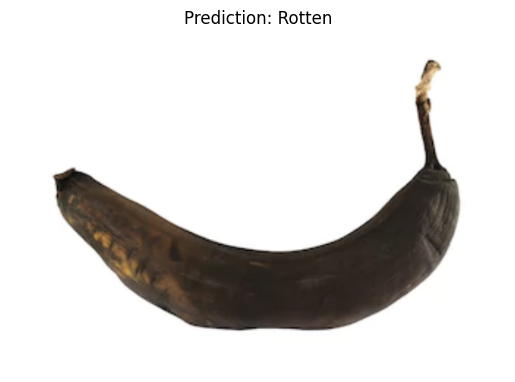

In [18]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Function to load and preprocess the uploaded image for prediction
def load_image_for_prediction(img_path):
    img = image.load_img(img_path, target_size=(100, 100))  # Load and resize the image
    img_array = image.img_to_array(img)  # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions for model input
    img_array = img_array / 255.0  # Normalize the image

    return img_array

# Function to predict if the fruit is fresh or rotten
def predict_fresh_or_rotten(model, img_path):
    img_array = load_image_for_prediction(img_path)
    prediction = model.predict(img_array)

    if prediction > 0.5:
        return 'Rotten'
    else:
        return 'Fresh'

# Example usage:
img_path = '/content/fruits_dataset/dataset/train/rottenbanana/Screen Shot 2018-06-12 at 8.48.46 PM.png'  # Path to the uploaded image
result = predict_fresh_or_rotten(model_fresh_rotten, img_path)
print(f"The fruit is: {result}")

# Optionally display the image
img = image.load_img(img_path)
plt.imshow(img)
plt.title(f'Prediction: {result}')
plt.axis('off')
plt.show()

In [19]:
import os
import numpy as np
import cv2
from tqdm import tqdm

def load_fruit_data():
    X = []
    Y = []
    base_dir = '/content/fruits_dataset/dataset/train'  # Update path as needed

    # Define categories
    categories = ['freshapples', 'freshbanana', 'freshoranges',
                  'rottenapples', 'rottenbanana', 'rottenoranges']

    # Load images and their corresponding labels
    for category in categories:
        path = os.path.join(base_dir, category)
        label = category  # Using category as the label
        for img_name in tqdm(os.listdir(path)):
            img = cv2.imread(os.path.join(path, img_name))
            img = cv2.resize(img, (100, 100))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            X.append(img)
            Y.append(label)  # Store the full label (e.g., "freshapples")

    return np.array(X), np.array(Y)

# Load the dataset
X, Y = load_fruit_data()

# Normalize the images
X = X / 255.0

100%|██████████| 1595/1595 [00:08<00:00, 193.36it/s]


In [20]:
import collections
print(collections.Counter(Y))  # Check the class distribution

Counter({'rottenapples': 2342, 'rottenbanana': 2224, 'freshapples': 1693, 'rottenoranges': 1595, 'freshbanana': 1581, 'freshoranges': 1466})


In [21]:
from sklearn.model_selection import train_test_split

# Encode the labels into numerical values
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)

# Split the dataset
X_train, X_val, Y_train, Y_val = train_test_split(X, Y_encoded, test_size=0.2, random_state=42)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

def build_fruit_classification_model():
    model = Sequential()
    model.add(Input(shape=(100, 100, 3)))  # Specify input shape here
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(len(label_encoder.classes_), activation='softmax'))  # Use softmax for multi-class classification
    return model

# Build the model
model_fruit = build_fruit_classification_model()

In [23]:
from sklearn.utils import class_weight
import numpy as np

# Class counts from your dataset
class_counts = {
    'rottenapples': 2342,
    'rottenbanana': 2224,
    'freshapples': 1693,
    'rottenoranges': 1595,
    'freshbanana': 1581,
    'freshoranges': 1466
}

# Convert the counts into an array
counts = np.array(list(class_counts.values()))

# Calculate class weights
class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(list(class_counts.keys())),
                                                  y=np.repeat(list(class_counts.keys()), counts))

# Assign the weights in the order you mentioned
class_weights_dict = {
    0: class_weights[0],  # 'rottenapples'
    1: class_weights[1],  # 'rottenbanana'
    2: class_weights[2],  # 'freshapples'
    3: class_weights[3],  # 'rottenoranges'
    4: class_weights[4],  # 'freshbanana'
    5: class_weights[5],  # 'freshoranges'
}

print("Class Weights: ", class_weights_dict)

# Compile the model
model_fruit.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with class weights
history_fruit = model_fruit.fit(X_train, Y_train,
                                epochs=20,
                                validation_data=(X_val, Y_val),
                                class_weight=class_weights_dict)  # Apply class weights here

Class Weights:  {0: 1.073144319747982, 1: 1.149167193759224, 2: 1.23931332423829, 3: 0.7757614574437802, 4: 0.8169214628297362, 5: 1.139080459770115}
Epoch 1/20
273/273 [==============================] - 119s 430ms/step - loss: 0.7989 - accuracy: 0.7109 - val_loss: 0.4205 - val_accuracy: 0.8707
Epoch 2/20
273/273 [==============================] - 120s 440ms/step - loss: 0.3931 - accuracy: 0.8602 - val_loss: 0.2620 - val_accuracy: 0.9028
Epoch 3/20
273/273 [==============================] - 117s 430ms/step - loss: 0.2927 - accuracy: 0.8989 - val_loss: 0.2365 - val_accuracy: 0.9106
Epoch 4/20
273/273 [==============================] - 122s 446ms/step - loss: 0.2322 - accuracy: 0.9154 - val_loss: 0.1811 - val_accuracy: 0.9335
Epoch 5/20
273/273 [==============================] - 124s 453ms/step - loss: 0.2093 - accuracy: 0.9243 - val_loss: 0.2338 - val_accuracy: 0.9133
Epoch 6/20
273/273 [==============================] - 115s 422ms/step - loss: 0.1947 - accuracy: 0.9307 - val_loss: 0.15

In [24]:
loss, accuracy = model_fruit.evaluate(X_val, Y_val)
print(f'Validation Loss: {loss:.4f}, Validation Accuracy: {accuracy:.4f}')

69/69 [==============================] - 6s 93ms/step - loss: 0.1111 - accuracy: 0.9619
Validation Loss: 0.1111, Validation Accuracy: 0.9619


In [25]:
# Save the model
model_fruit.save('fruit_classification_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


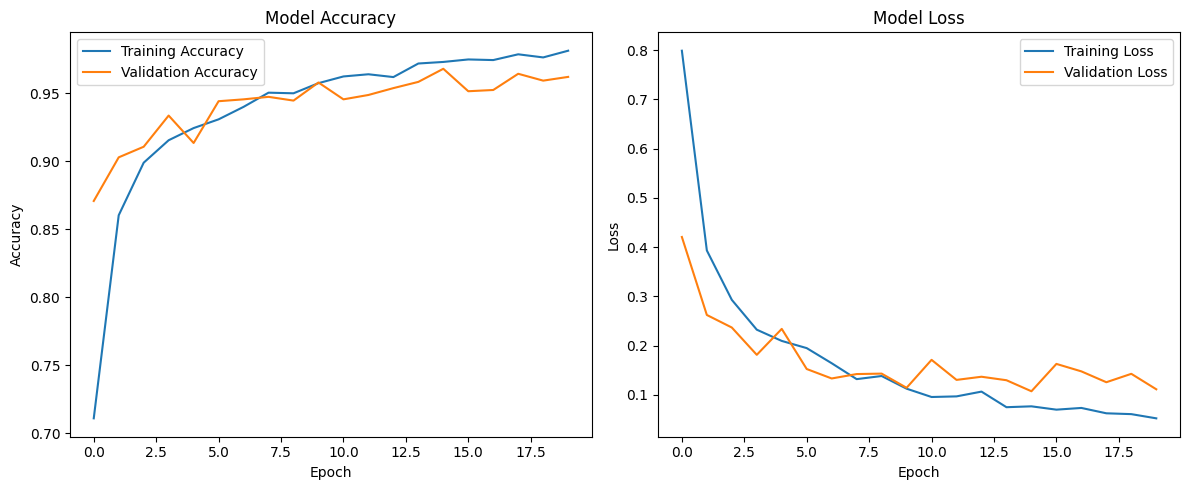

In [26]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_fruit.history['accuracy'], label='Training Accuracy')
plt.plot(history_fruit.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_fruit.history['loss'], label='Training Loss')
plt.plot(history_fruit.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

69/69 [==============================] - 6s 93ms/step


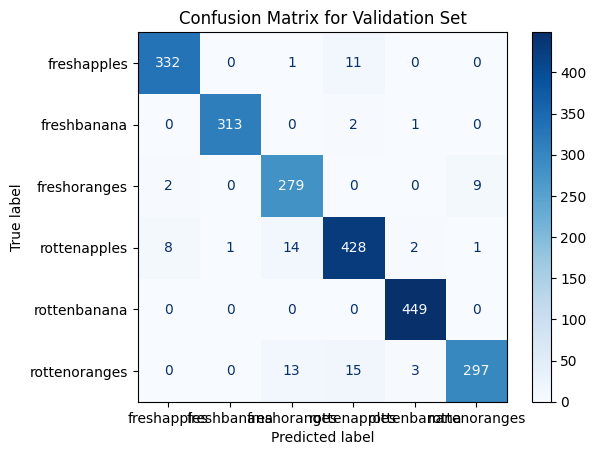

In [27]:
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get predictions for the validation set
Y_pred_val = model_fruit.predict(X_val)
Y_pred_val_classes = np.argmax(Y_pred_val, axis=1)  # Convert probabilities to class predictions

# Compute confusion matrix
cm_val = confusion_matrix(Y_val, Y_pred_val_classes)

# Display confusion matrix
disp_val = ConfusionMatrixDisplay(confusion_matrix=cm_val, display_labels=label_encoder.classes_)
disp_val.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Validation Set')
plt.show()

In [28]:
from tensorflow.keras.preprocessing import image
import numpy as np

def load_image_for_prediction(img_path, target_size=(100, 100)):
    # Load the image from the path
    img = image.load_img(img_path, target_size=target_size)
    # Convert the image to a numpy array
    img_array = image.img_to_array(img)
    # Expand dimensions to match the model's expected input shape (batch size, height, width, channels)
    img_array = np.expand_dims(img_array, axis=0)
    # Normalize the image data (scale pixel values between 0 and 1)
    img_array = img_array / 255.0
    return img_array

1/1 [==============================] - 0s 24ms/step
The fruit is: rottenapples


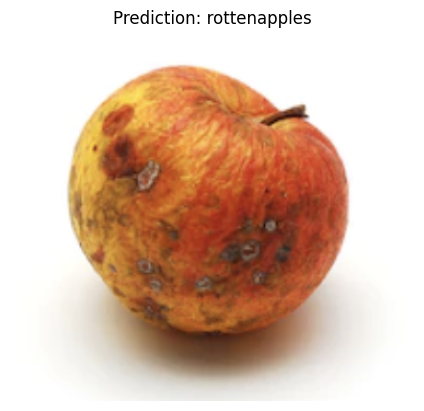

In [29]:
categories = ['freshapples', 'freshbanana', 'freshoranges',
              'rottenapples', 'rottenbanana', 'rottenoranges']

def predict_fruit_category(model, img_path):
    # Load and preprocess the image
    img_array = load_image_for_prediction(img_path)
    # Make a prediction
    prediction = model.predict(img_array)
    # Get the label with the highest predicted probability
    predicted_label = categories[np.argmax(prediction)]
    return predicted_label  # Return the label (e.g., "freshapples", "rottenapples")
# Example usage:
img_path = '/content/fruits_dataset/dataset/train/rottenapples/Screen Shot 2018-06-07 at 2.17.15 PM.png'  # Path to the uploaded image
result = predict_fruit_category(model_fruit, img_path)
print(f"The fruit is: {result}")

# Display the image with the prediction
img = image.load_img(img_path)
plt.imshow(img)
plt.title(f'Prediction: {result}')
plt.axis('off')
plt.show()

1/1 [==============================] - 0s 27ms/step
The fruit is: rottenapples
Freshness Index: 0.00%


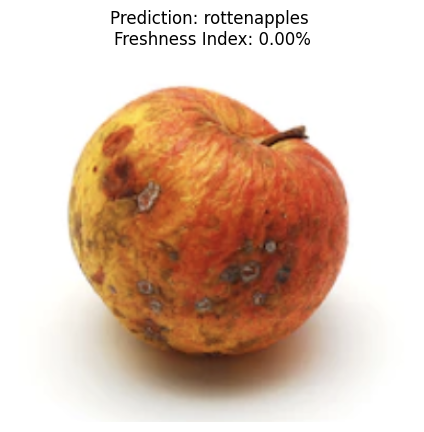

In [30]:
from tensorflow.keras.preprocessing import image
import numpy as np

# List of fruit categories
categories = ['freshapples', 'freshbanana', 'freshoranges',
              'rottenapples', 'rottenbanana', 'rottenoranges']

# Function to load and preprocess the image for prediction
def load_image_for_prediction(img_path, target_size=(100, 100)):
    img = image.load_img(img_path, target_size=target_size)  # Load and resize the image
    img_array = image.img_to_array(img)  # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions for model input
    img_array = img_array / 255.0  # Normalize the image
    return img_array

# Function to predict the fruit category and calculate freshness index
def predict_fruit_with_freshness_index(model, img_path):
    # Load and preprocess the image
    img_array = load_image_for_prediction(img_path)

    # Predict the category probabilities
    prediction = model.predict(img_array)

    # Get the label with the highest predicted probability
    predicted_label = categories[np.argmax(prediction)]

    # Fresh categories indices (0: fresh apples, 1: fresh bananas, 2: fresh oranges)
    fresh_indices = [0, 1, 2]

    # Calculate freshness index (sum of probabilities of fresh categories)
    freshness_index = np.sum(prediction[0][fresh_indices]) * 100  # Convert to percentage

    # Return the predicted label and the freshness index
    return predicted_label, freshness_index

# Example usage:
img_path = '/content/fruits_dataset/dataset/train/rottenapples/Screen Shot 2018-06-07 at 2.17.15 PM.png'  # Path to the uploaded image
result, freshness_index = predict_fruit_with_freshness_index(model_fruit, img_path)
print(f"The fruit is: {result}")
print(f"Freshness Index: {freshness_index:.2f}%")

# Display the image with the prediction and freshness index
img = image.load_img(img_path)
plt.imshow(img)
plt.title(f'Prediction: {result} \nFreshness Index: {freshness_index:.2f}%')
plt.axis('off')
plt.show()


1/1 [==============================] - 0s 24ms/step
The fruit is: freshoranges
Freshness Index: 100.00%


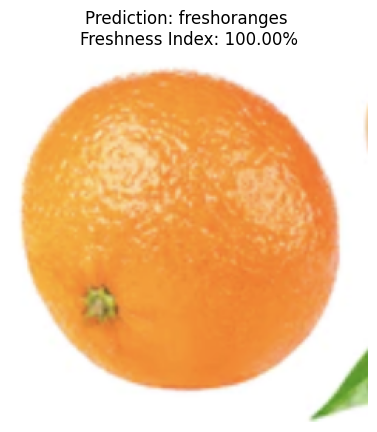

In [33]:
from tensorflow.keras.preprocessing import image
import numpy as np

# List of fruit categories
categories = ['freshapples', 'freshbanana', 'freshoranges',
              'rottenapples', 'rottenbanana', 'rottenoranges']

# Function to load and preprocess the image for prediction
def load_image_for_prediction(img_path, target_size=(100, 100)):
    img = image.load_img(img_path, target_size=target_size)  # Load and resize the image
    img_array = image.img_to_array(img)  # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions for model input
    img_array = img_array / 255.0  # Normalize the image
    return img_array

# Function to predict the fruit category and calculate freshness index
def predict_fruit_with_freshness_index(model, img_path):
    # Load and preprocess the image
    img_array = load_image_for_prediction(img_path)

    # Predict the category probabilities
    prediction = model.predict(img_array)

    # Get the label with the highest predicted probability
    predicted_label = categories[np.argmax(prediction)]

    # Fresh categories indices (0: fresh apples, 1: fresh bananas, 2: fresh oranges)
    fresh_indices = [0, 1, 2]

    # Calculate freshness index (sum of probabilities of fresh categories)
    freshness_index = np.sum(prediction[0][fresh_indices]) * 100  # Convert to percentage

    # Return the predicted label and the freshness index
    return predicted_label, freshness_index

# Example usage:
img_path = '/content/fruits_dataset/dataset/train/freshoranges/Screen Shot 2018-06-12 at 11.50.28 PM.png'  # Path to the uploaded image
result, freshness_index = predict_fruit_with_freshness_index(model_fruit, img_path)
print(f"The fruit is: {result}")
print(f"Freshness Index: {freshness_index:.2f}%")

# Display the image with the prediction and freshness index
img = image.load_img(img_path)
plt.imshow(img)
plt.title(f'Prediction: {result} \nFreshness Index: {freshness_index:.2f}%')
plt.axis('off')
plt.show()
